<a href="https://colab.research.google.com/github/Salome-PB/deep-learning-experiments/blob/main/SIT742Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

Putting in all the imports below

In [ ]:
from google.colab import drive

from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import col

import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
# Mounting the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
spark = SparkSession.builder.master("local").appName("end-assessment").getOrCreate()

In [ ]:
file_path = '/content/drive/MyDrive/end-term-assessment/transactionrecord'
tr_df = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
tr_df.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
|       581475|12/9/2019|    21705|Bag 500g Swirly M...|             0ca|10.65| 

## Part 1: Data Acquisition and Manipulation

**Question 1.1:**
Using PySpark to do some of the data wrangling process, so that:

1.1.1 For the 'NA' in CustomerNo columns, change it to '-1'.

Answer 1.1.1

In [ ]:
tr_df.summary().show()

+-------+------------------+---------+------------------+--------------------+----------------+------------------+------------------+------------------+-----------+
|summary|     TransactionNo|     Date|         ProductNo|         ProductName|Product_category|             Price|          Quantity|        CustomerNo|    Country|
+-------+------------------+---------+------------------+--------------------+----------------+------------------+------------------+------------------+-----------+
|  count|            536350|   536350|            536350|              536350|          536350|            536350|            536350|            536350|     536350|
|   mean| 559978.9296258752|     NULL|27501.334602703962|                NULL|            NULL|12.662182287696377| 9.919347441036637| 15226.33153164911|       NULL|
| stddev|13434.267079569996|     NULL|16621.547250098723|                NULL|            NULL| 8.490450200816936|216.66229978946325|1723.4078307836835|       NULL|
|    min| 

In [ ]:
# Counting the number of NAs in CustomerNo column
tf_df_na_count = tr_df.filter(tr_df.CustomerNo.isNull()).count()
print(f"Number of missing values in CustomerNo: {tf_df_na_count}")

Number of missing values in CustomerNo: 0


1.1.2 Process the text in productName column, only alphabet characters left, and save the processed result to a new column productName_process and show the first 5 rows

Answer 1.1.2

In [ ]:
# Pre-processing the ProductName column and create a new column productName_process
# The below regex matches [^A-Za-z] matches any character that is not an alphabet letter (both uppercase and lowercase)
# The regex_replace function replaces these non-alphabetic characters with empty string
tr_df = tr_df.withColumn('ProductName_process', regexp_replace(tr_df.ProductName, '[^A-Za-z]', ''))
# Showing the first 5 rows of the original productName and the pre-processed productName_process
tr_df.select('ProductName', 'ProductName_process').show(5, truncate=False)

+-----------------------------------+-------------------------------+
|ProductName                        |ProductName_process            |
+-----------------------------------+-------------------------------+
|Set Of 2 Wooden Market Crates      |SetOfWoodenMarketCrates        |
|Christmas Star Wish List Chalkboard|ChristmasStarWishListChalkboard|
|Storage Tin Vintage Leaf           |StorageTinVintageLeaf          |
|Tree T-Light Holder Willie Winkie  |TreeTLightHolderWillieWinkie   |
|Set Of 4 Knick Knack Tins Poppies  |SetOfKnickKnackTinsPoppies     |
+-----------------------------------+-------------------------------+
only showing top 5 rows



**Question 1.2**

Find out the revenue on each transaction date. In order to achieve the above, some wrangling work is required to be done:

1.2.1 Using pyspark to calculate the revenue (price * Quantity) and save as float format in pyspark dataframe to show the top 5 rows.

Answer 1.2.1

In [ ]:
# Calculating Revenue as Price * Quantity below
tr_df = tr_df.withColumn('Revenue', (col('Price') * col('Quantity')).cast('float'))
# Displays the top 5 rows of Price, Quantity and Revenue
tr_df.select('Price', 'Quantity', 'Revenue').show(5)

+-----+--------+-------+
|Price|Quantity|Revenue|
+-----+--------+-------+
|21.47|      12| 257.64|
|10.65|      36|  383.4|
|11.53|      12| 138.36|
|10.65|      12|  127.8|
|11.94|       6|  71.64|
+-----+--------+-------+
only showing top 5 rows



1.2.2 Transform the pyspark dataframe to pandas dataframe (named as df) and create the column transaction_date with date format according to Date. Print your df pandas dataframe with top 5 rows after creating the column transaction_date

Answer 1.2.2

In [ ]:
df = tr_df.toPandas()

In [ ]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_process,Revenue,transaction_date
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,SetOfWoodenMarketCrates,257.640015,2019-12-09
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,ChristmasStarWishListChalkboard,383.399994,2019-12-09
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,StorageTinVintageLeaf,138.360001,2019-12-09
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,TreeTLightHolderWillieWinkie,127.800003,2019-12-09
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,SetOfKnickKnackTinsPoppies,71.639999,2019-12-09


In [ ]:
# Understand the date format in the Date column of the Spark dataframe
tr_df.select('Date').distinct().show(5, truncate=False)

+---------+
|Date     |
+---------+
|1/19/2019|
|11/9/2019|
|8/4/2019 |
|5/25/2019|
|2/22/2019|
+---------+
only showing top 5 rows



In [ ]:
# Format of Date is month/date/year. Adding a new column below where the Date column is converted to pandas date format
df['transaction_date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y').dt.strftime('%m/%d/%Y')

# Show the top 5 rows
df.head(5)

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,ProductName_process,Revenue,transaction_date
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,SetOfWoodenMarketCrates,257.640015,12/09/2019
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,ChristmasStarWishListChalkboard,383.399994,12/09/2019
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,StorageTinVintageLeaf,138.360001,12/09/2019
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,TreeTLightHolderWillieWinkie,127.800003,12/09/2019
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,SetOfKnickKnackTinsPoppies,71.639999,12/09/2019


1.2.3 Plot the sum of revenue on transaction_date in a line plot and find out any immediate pattern / insight?

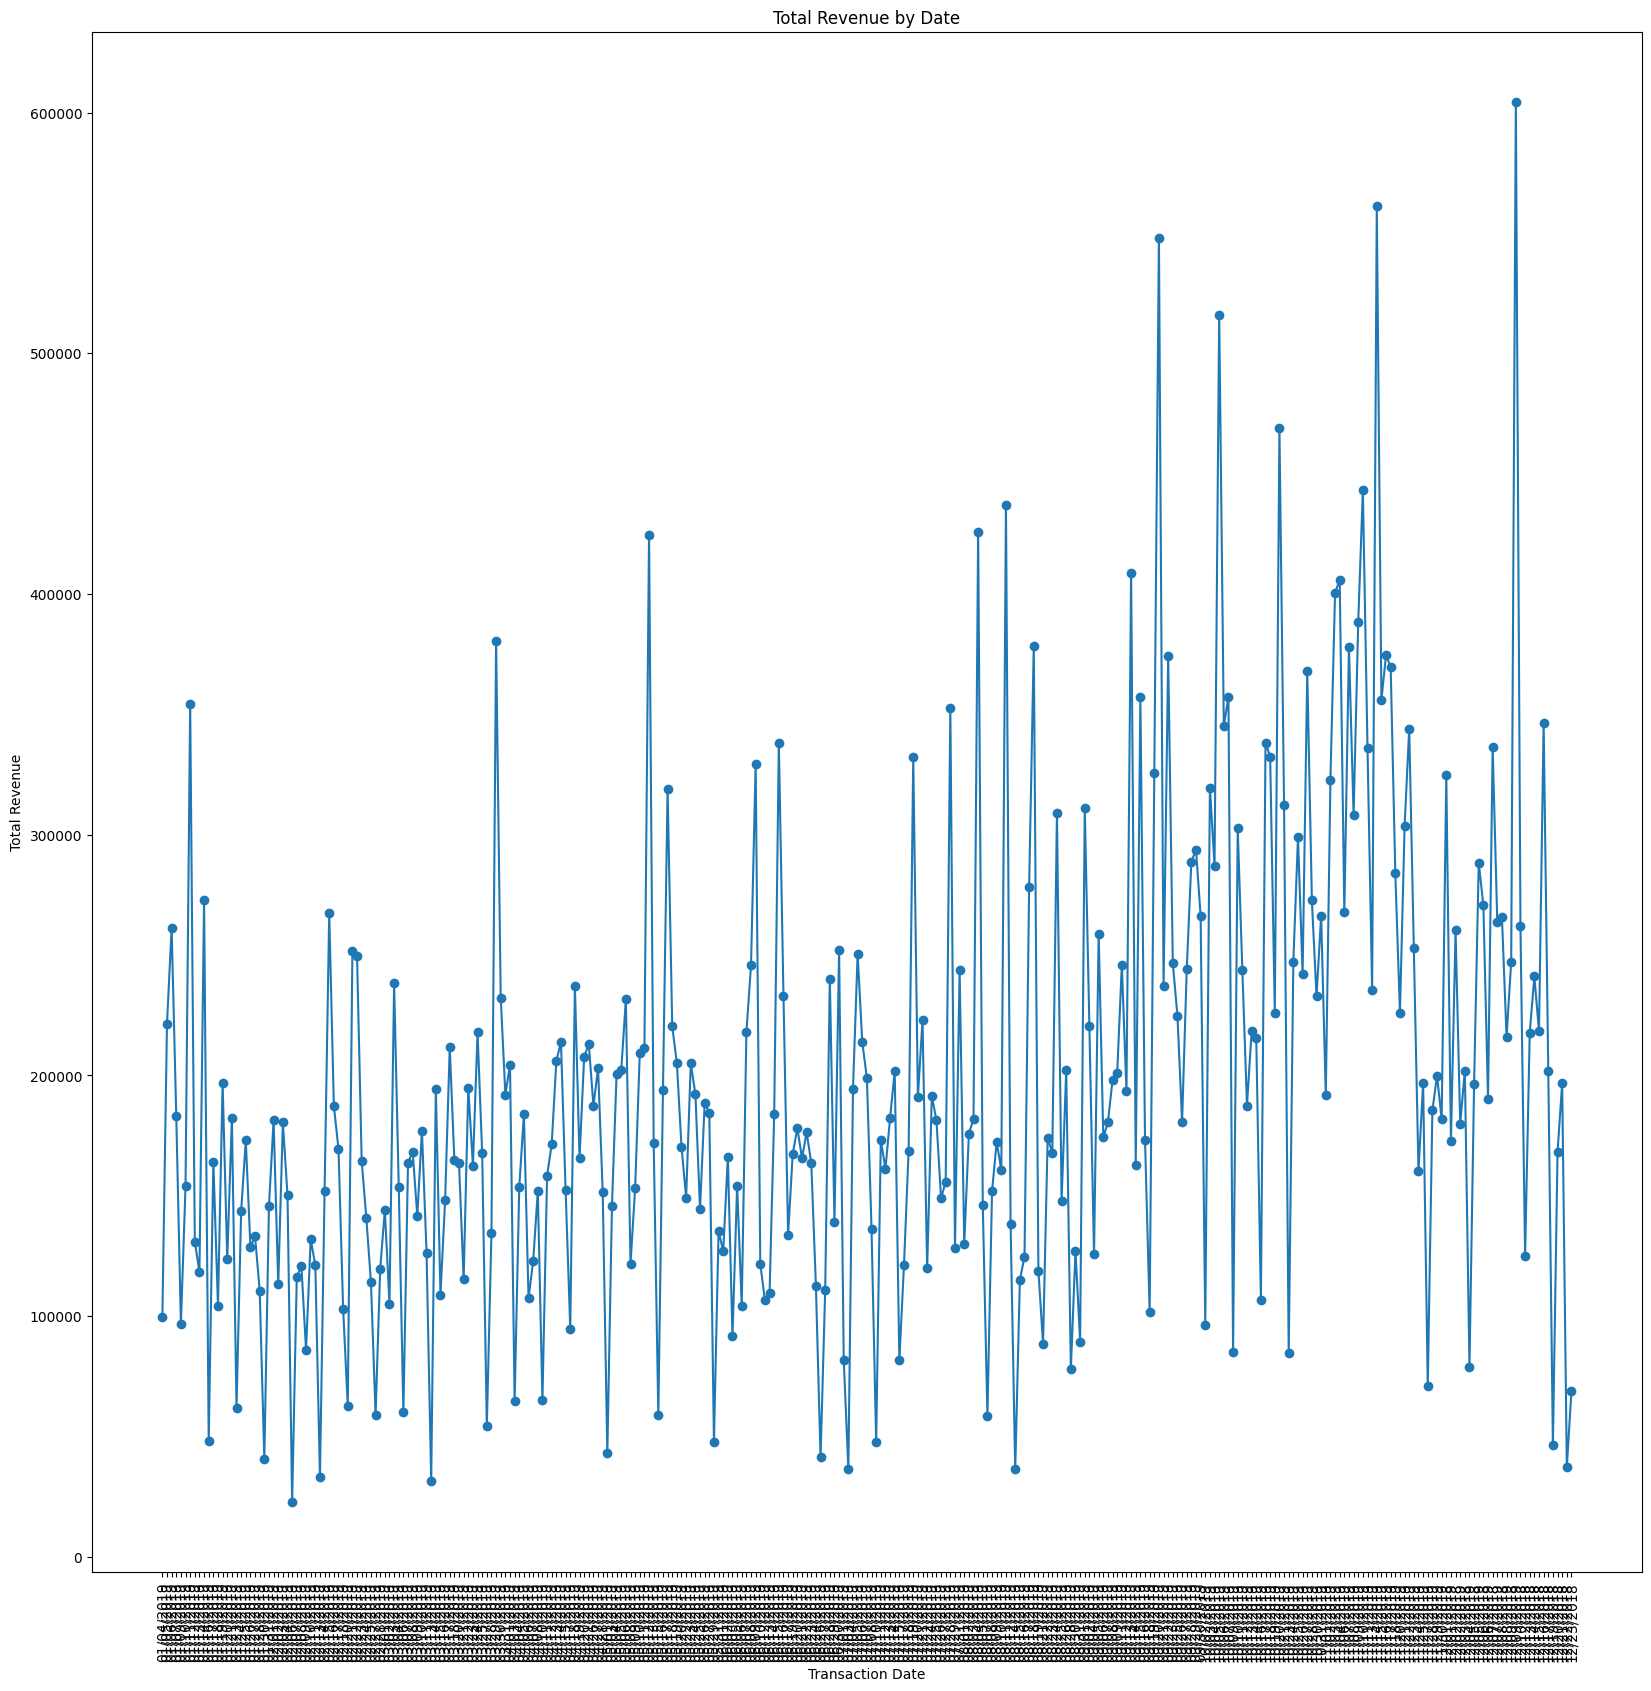

In [ ]:
# Group by transaction_date and sum the revenue
revenue_by_date = df.groupby('transaction_date')['Revenue'].sum().reset_index()

# Plot the sum of revenue on transaction_date
plt.figure(figsize=(20, 20))
plt.plot(revenue_by_date['transaction_date'], revenue_by_date['Revenue'], marker='o')
plt.title('Total Revenue by Date')
plt.xlabel('Transaction Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
#plt.grid(True)

# Show the plot
plt.show()